The gradient in SGD optimisers is calculated by an efficient organisation of the chain rule for differentiable loss and layer functions: **Backpropagation**

It is automatically implemented in TensorFlow

The gradient in SGD optimisers is calculated by an efficient organisation of the chain rule for differentiable loss and layer functions. This is **backpropagation**. It is automatically implemented in TensorFlow

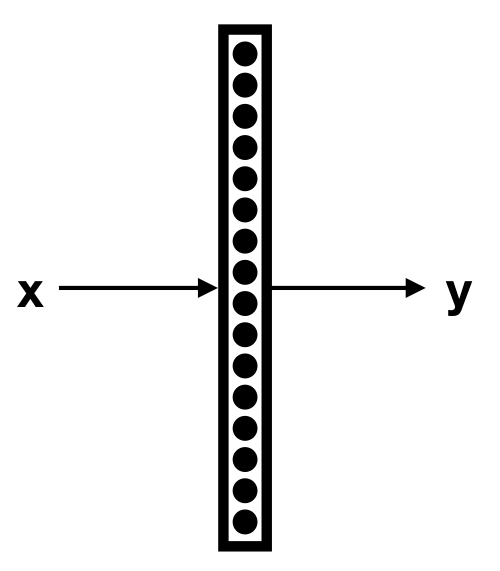

A layer: $x$ in and $y$ out.

$y = f(w \cdot x + b) = f(z)$

The layer transformation: activation of $w \cdot x + b$.

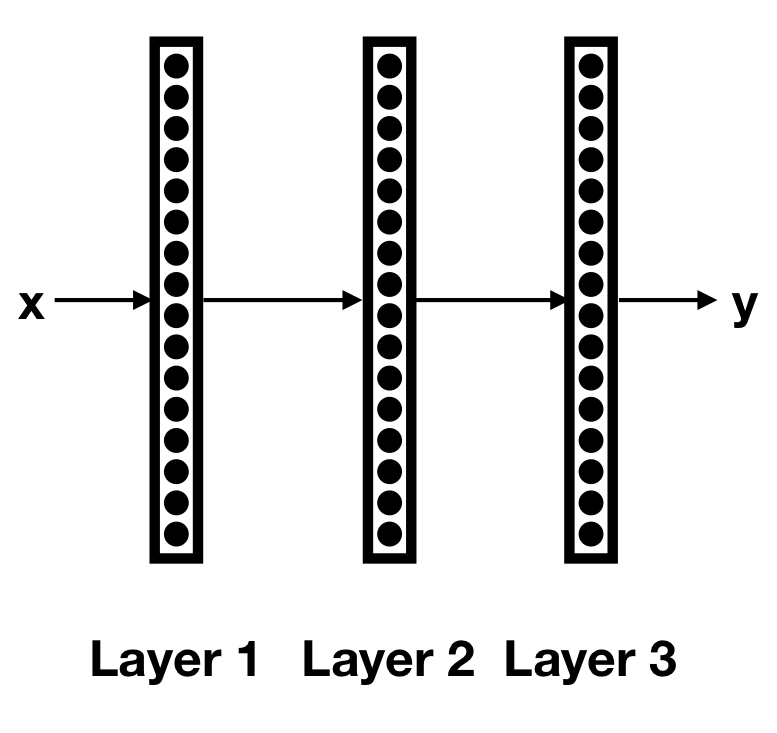

A three layer network.

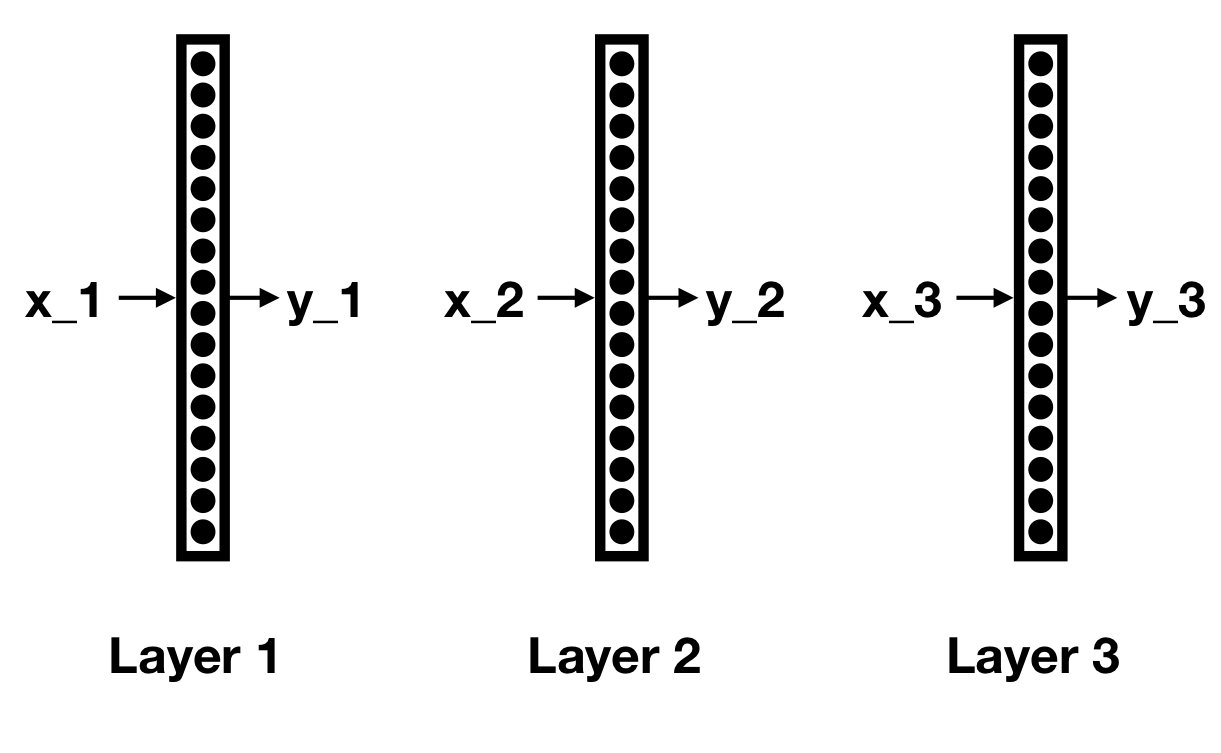

The layers with their inputs and outputs. 

Forward pass

\begin{align*}
y_3 &= f(z_3) \\
    &= f(w_3 \cdot x_3 + b_3) \\
    &= f(w_3 \cdot f(z_2)  + b_3) \\
    &= f(w_3 \cdot f(w_2 \cdot x_2 + b_2)  + b_3) \\
    &= f(w_3 \cdot f(w_2 \cdot f(z_1) + b_2)  + b_3) \\
    &= f(w_3 \cdot f(w_2 \cdot f(w_1 \cdot x_1 + b_1) + b_2)  + b_3)
\end{align*}

where $z_l = w_l \cdot x_l + b_l$ and $x_3 = y_2, x_2 = y_1$

The forward pass in gory detail. The output of layer 3 is activation of $w_3 \cdot x_3 + b_3$ where $x_3$ is layer 3 input. But layer 3 input is layer 2 output, and layer 2 output is activation of $w_2 \cdot x_2 + b_2$ and so on. You can imagine how awful the network transformation would look for bigger networks. In principle you could write out that awful thing and apply partial differentiation. But backpropagation is a lot cleverer.

The gradient for weights in layer $l$

$\frac{\partial f}{\partial w_l} = \frac{\partial f}{\partial y_3}\frac{\partial y_3}{\partial w_l}$

Compute $\frac{\partial y_3}{\partial w_l}$ for weights in layers $l = 3, 2 \text{ and } 1$ in a backwards pass (and similarly for $b$)

The gradient with respect to the weights in layer $l$ is, by the chain rule, the derivative with respect to network output, $\frac{\partial f}{\partial y_3}$, times the derivative of the network output with respect to the layer $l$ weights. Backpropagation works by calculating $\frac{\partial y_3}{\partial w_l}$ in a backwards pass, from $l=3$ down to $1$.

Layer 3

\begin{align*} 
\frac{\partial y_3}{\partial w_3} &= \frac{\partial (f(z_3))}{\partial w_3} \\
                  &= \frac{\partial f}{\partial z_3}\frac{\partial z_3}{\partial w_3} \\ 
                  &= \delta^3 \frac{\partial z_3}{\partial w_3}
\end{align*}

The change in network output with respect to the weights of layer 3 is $\delta^3$ times $\frac{\partial z_3}{\partial w_3}$ - easy to calculate because $z_3 = w_3 \cdot x_3 + b_3$.

Layer 2

\begin{align*}
\frac{\partial y_3}{\partial w_2} &= \frac{\partial (f(z_3))}{\partial w_2} \\
                  &= \frac{\partial f}{\partial z_3}\frac{\partial z_3} {\partial z_2}\frac{\partial z_2}{\partial w_2}\\ 
                  &= \delta^2 \frac{\partial z_2}{\partial w_2} \\ 
                  &= \delta^3 \frac{\partial z_3}{dz_2} \frac{\partial z_2}{dw_2}
\end{align*}

This slide says that the change in network output with respect to the weights of layer 2 is $\delta^2$ times $\frac{\partial z_2}{\partial w_2}$ - but one factor of $\delta^2$ is $\delta^3$, which has already been calculated. 

Layer 1

\begin{align*}
\frac{\partial y_3}{\partial w_1} &= \frac{\partial f}{\partial z_3}\frac{\partial z_3}{\partial z_2}\frac{\partial z_2}{\partial z_1}\frac{\partial z_1}{\partial w_1} \\ 
                &= \delta^1 \frac{\partial z_1}{\partial w_1} \\ 
                &= \delta^2 \frac{\partial z_2}{\partial z_1}\frac{\partial z_1}{\partial w_1} \\
                &= \delta^3 \frac{\partial z_3}{\partial z_2}\frac{\partial z_2}{\partial z_1}\frac{\partial z_1}{\partial w_1}
\end{align*}

The final layer gradient follows a similar pattern: the change in network output with respect to layer 3 weights is $\delta^1$ times $\frac{\partial z_1}{\partial w_1}$ and $\delta^1$ can be calculated from $\delta^2$ which in turn can be calculated from $\delta^3$. It's as if the delta's snowball as the calculation moves backwards through the network. 

The backpropagation algorithm for an n-layer network is

\begin{cases}
\delta^n = \frac{\partial f}{dz_n} \\
\delta^l = \delta^{l + 1}\frac{\partial z_{l+1}}{\partial z_l} \quad (l \ne n)\\
\frac{\partial f}{\partial w_l} = \frac{\partial f}{\partial y_n}\left(\delta^l \frac{\partial z_l}{\partial w_l}\right)
\end{cases}


These relations show the recursive structure of the backpropagation algorithm. There is an equivalent set of relations for the bias parameters. 

Backpropagation is no more than an efficient organisation of the chain rule. The object is the calculation of the gradient of the loss in weight-bias space. The parameter updates are then computed with the stochastic gradient descent algorithm. This is the take-home message. The algebraic details are not important.